# Tag 2. Kapitel 9. R Data & Visualisation

## Lab8. Projekt mit ggplot2 - Lösung

Für dieses optionale Projekt werden wir diese Grafik aus [The Economist](https://www.economist.com/blogs/dailychart/2011/12/corruption-and-development) nachbauen:
___
<img src= "Economist1.png" />
___

Dabei kannst du so viel oder so wenig lösen wie du möchtest. Wir haben bisher nicht jedes Detail abgedeckt, das wir nun verwenden werden. Alle notwendigen Herangehensweisen wie die Arbeit mit der Dokumentation sind uns aber bereits bekannt! Viel Erfolg und Spaß beim Lösen der Aufgabe:

### Was wir tun wollen

* Diese Aufgabe wird sehr schwierig sein! Wir stellen die gezeigt Grafik anhand der nachfolgend angegebenen Schritte dar. Wir werden außerdem *die Dokumentation verwenden müssen*. Einige Bestandteile der Aufgabe haben wir absichtlich noch nicht behandelt um nun die Arbeit mit der Dokumentation trainieren zu können. Links und Hinweise werden entlang des Projekts bereitgestellt!

### Fangen wir an!

**Importiere die ggplot2 und data.table Libraries und nutze fread um die CSV-Datei "Economist_assignment_Data.csv" in einen Data Frame namens df zu laden (Hinweis: nutze drop=1, um die erste Spalte zu überspringen).**

In [1]:
library(ggplot2)
library(data.table)
df <- fread('Economist_Assignment_Data.csv',drop=1)

**Schaue dir den head von df an**

In [3]:
#help(fread)

In [4]:
head(df)

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


**Nutze ggplot() + geom_point(), um ein Scatterplot Onjekt namens *pl* zu erstellen. Du wirst x=[CPI](https://de.wikipedia.org/wiki/Korruptionswahrnehmungsindex) und y=[HDI](https://de.wikipedia.org/wiki/Happy_Planet_Index) sowie color=Region als aesthetics festlegen müssen.**

In [5]:
pl <- ggplot(df,aes(x=CPI,y=HDI,color=Region)) + geom_point()

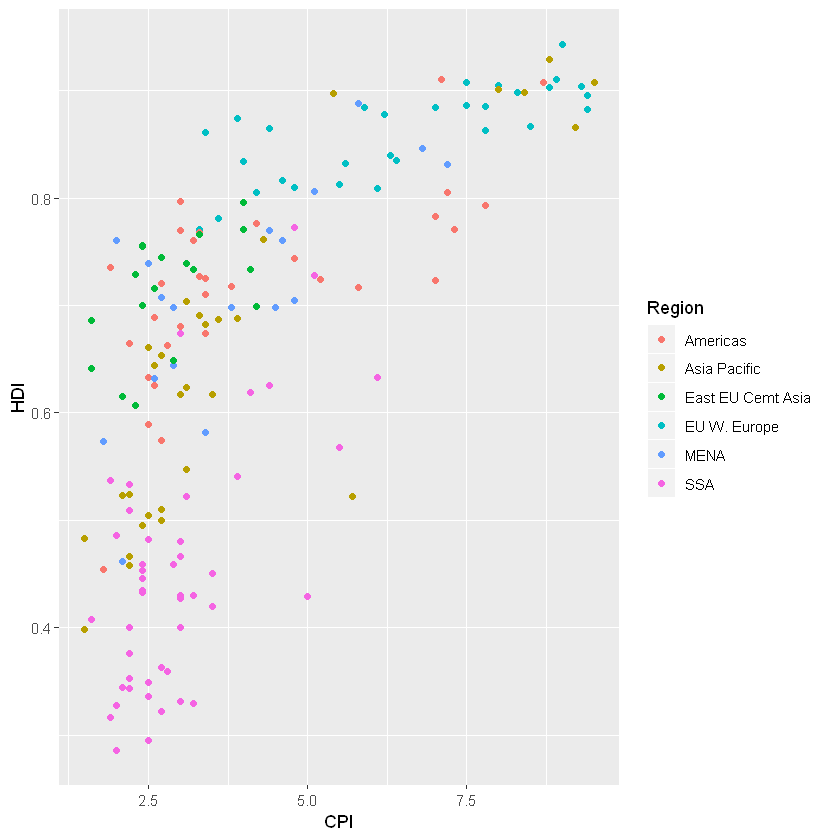

In [6]:
pl

**Ändere die Punkte zu größeren leeren Kreisen. Dazu wirst du einen Schritt wiederholen und geom_point() Argumente hinzufügen müssen. Wir wollen size und shape bearbeiten.**

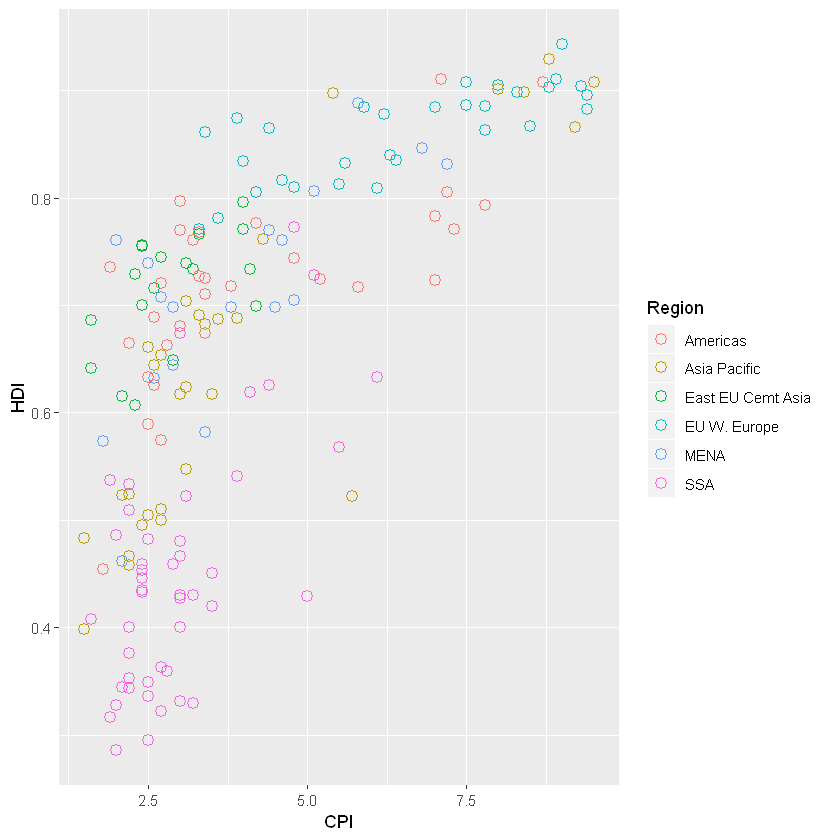

In [9]:
pl <- ggplot(df,aes(x=CPI,y=HDI,color=Region)) + geom_point(size=3,shape=1)
pl

**üge [geom_smooth(aes(group=1))](http://docs.ggplot2.org/current/geom_smooth.html) hinzu, um eine Trendlinie zu erzeugen.**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


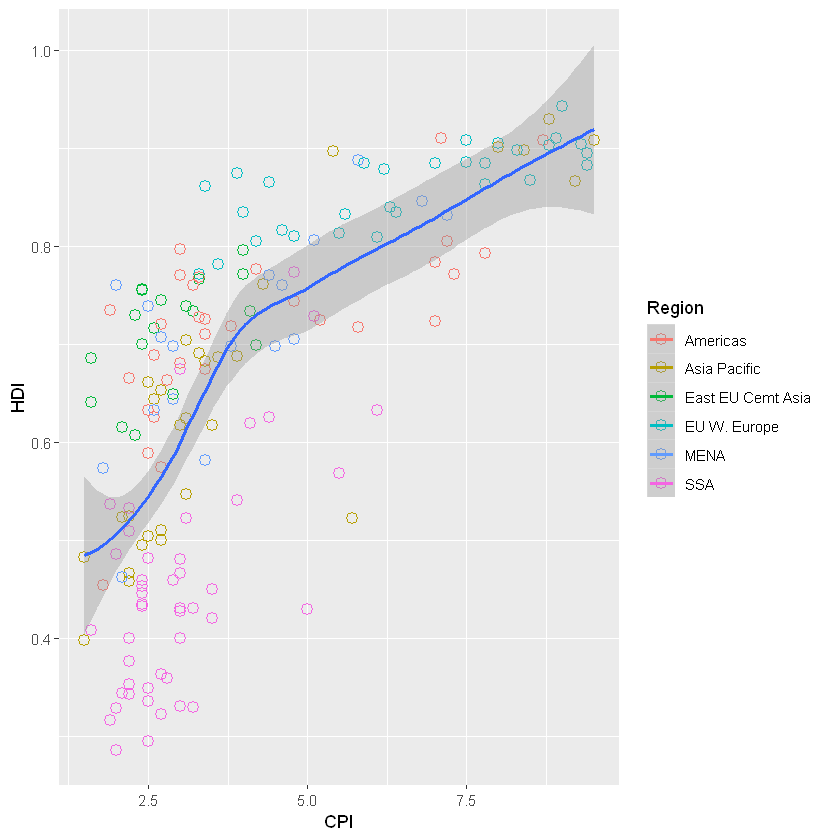

In [10]:
pl + geom_smooth(aes(group=1))

**Wir wollen das nun noch weiter bearbeiten. Füge die folgenden Argumente zu geom_smooth (außerhalb von aes) hinzu:**

* method = 'lm'
* formula = y ~ log(x)
* se = FALSE
* color = 'red'

** Für weitere Informationen zu diesen Argumenten schaue unter *Arguments* in der [Dokumentation](http://docs.ggplot2.org/current/geom_smooth.html) nach.**

** Weise all das pl2 zu. **

In [11]:
pl2 <- pl + geom_smooth(aes(group=1),method ='lm',formula = y~log(x),se=FALSE,color='red')

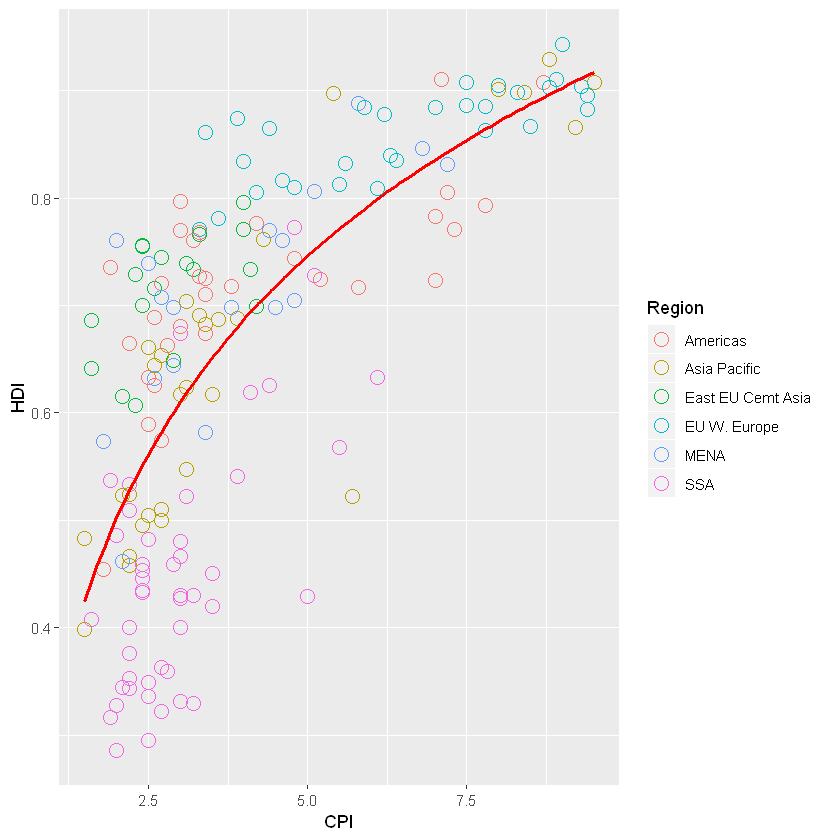

In [23]:
pl2

** So langsam nähern wir uns unserem Ziel! Wir müssen allerdings noch Bezeichnungen hinzufügen. Dazu bietet sich [geom_text](http://docs.ggplot2.org/current/geom_text.html) an! Füge *geom_text(aes(label=Country))* zu pl2 hinzu und sieht dir an, was passiert (Hinweis: es sollten zu viele Labels erscheinen).**

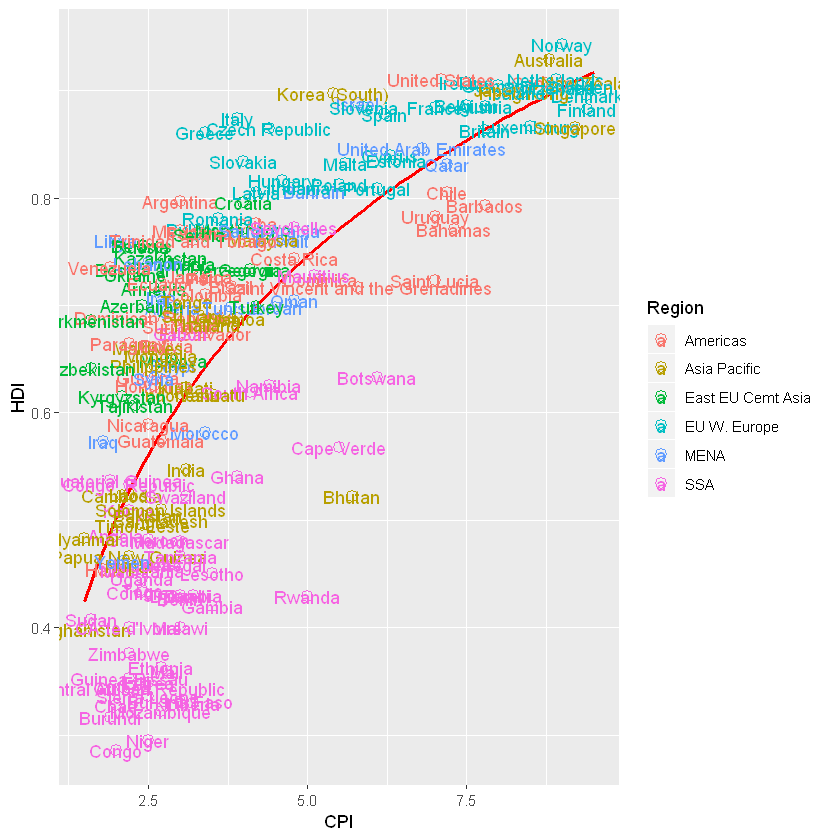

In [12]:
pl2 + geom_text(aes(label=Country))

**Da es recht knifflig ist ein Subset von Punkten zu labeln werden wir diesen Schritt für dich lösen**

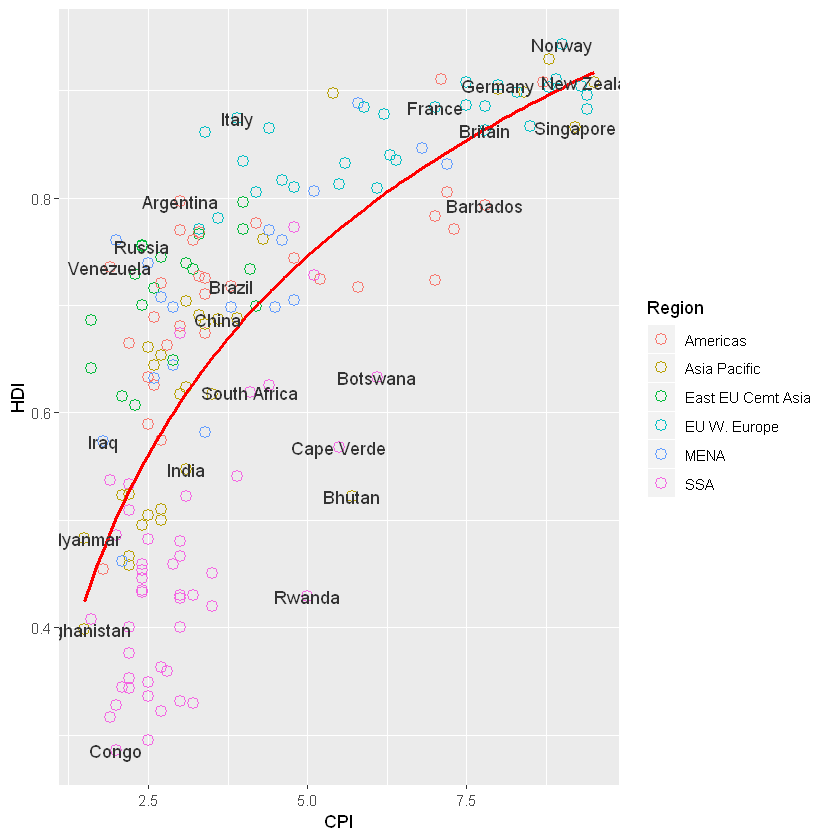

In [13]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl3 <- pl2 + geom_text(aes(label = Country), color = "gray20", 
                data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

**Fast geschafft! Nicht perfekt, aber für dieses Projekt allemal gut genug. Später werden wir sehen warum interaktive Grafiken für Labels besser geeignet sind. Jetzt werden wir nur noch ein Theme hinzufügen sowie die Skala für x und y bestimmen und dann sind wir fertig!**

** Füge theme_bw() zur Grafik hinzu und speichere es unter pl4.**

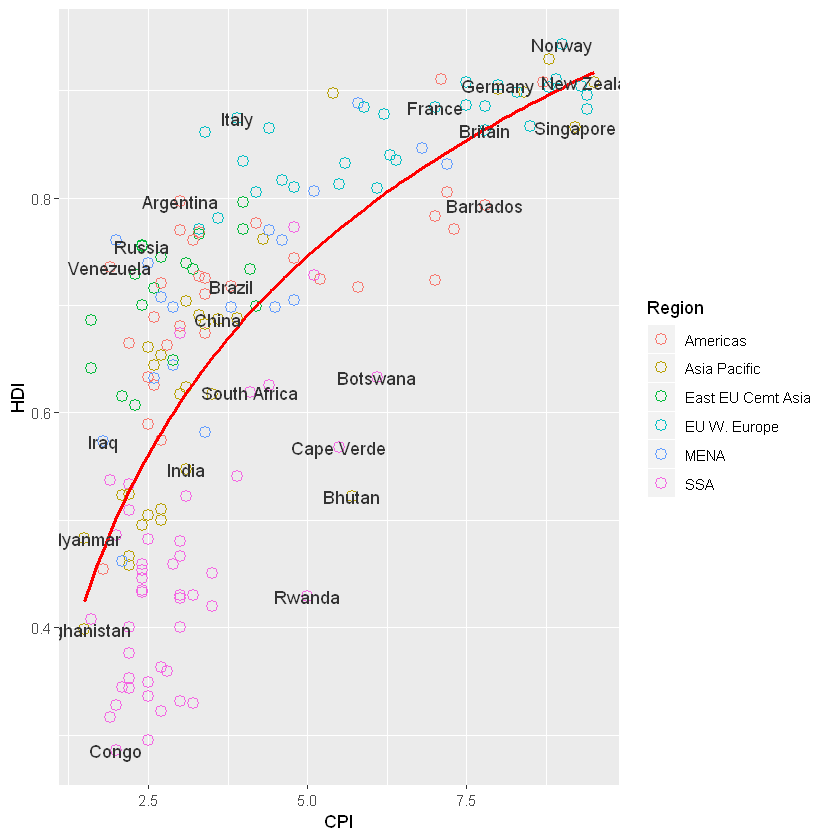

In [15]:
pl4 <- pl3 + theme_get() #+ theme_bw() 
pl4

**Füge [scale_x_continuous()](http://docs.ggplot2.org/current/scale_continuous.html) hinzu und übergebe folgende Argumente:**

* name = *Same x axis as the Economist Plot*
* limits = *Pass a vector of appropriate x limits*
* breaks = 1:10

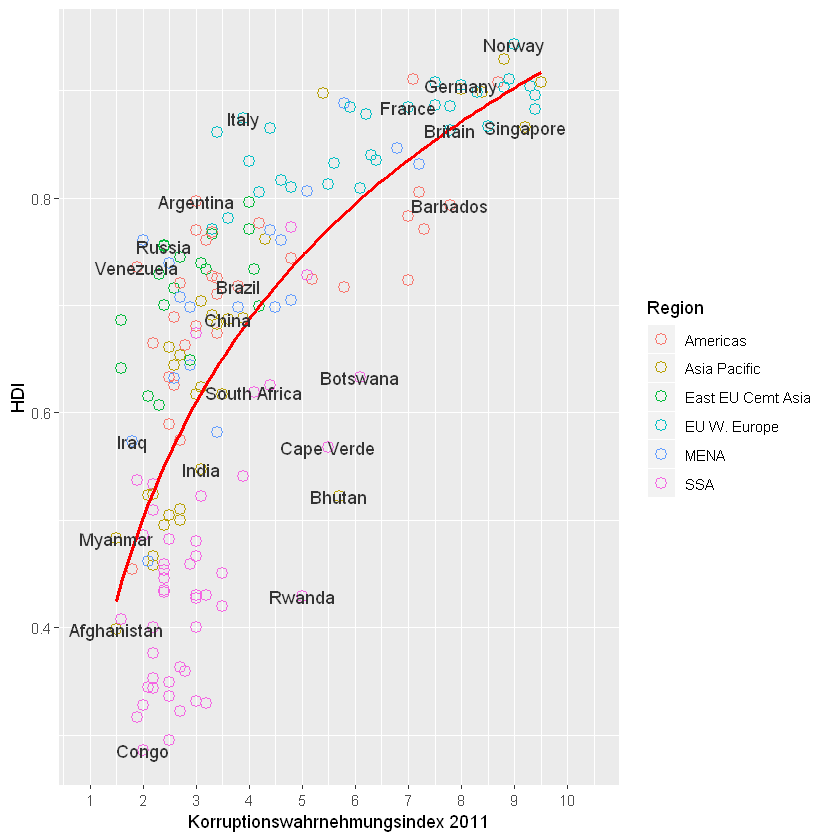

In [19]:
pl5 <- pl4 + scale_x_continuous(name = "Korruptionswahrnehmungsindex 2011",
                     limits = c(.9, 10.5),breaks=1:10) 
pl5

**Nutze jetzt scale_y_continuous um die gleichen Operationen für die y-Achse durchzuführen.**

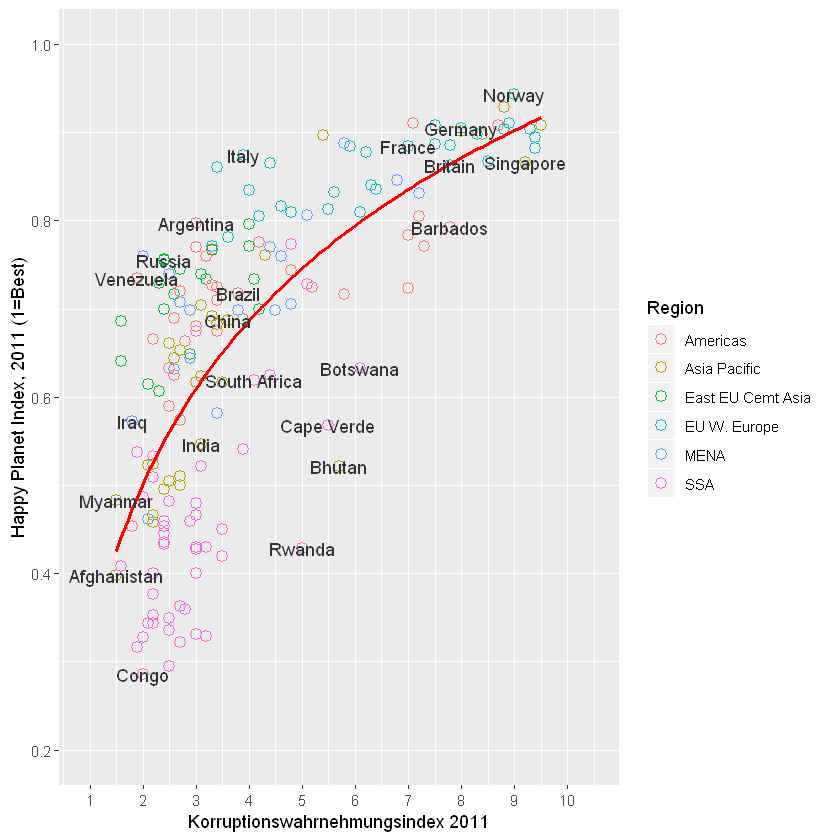

In [20]:
pl6 <- pl5 + scale_y_continuous(name = "Happy Planet Index, 2011 (1=Best)",
                     limits = c(0.2, 1.0))
pl6

**Abschließend sollst du ggtitle() verwenden um einen String als Titel hinzuzufügen**

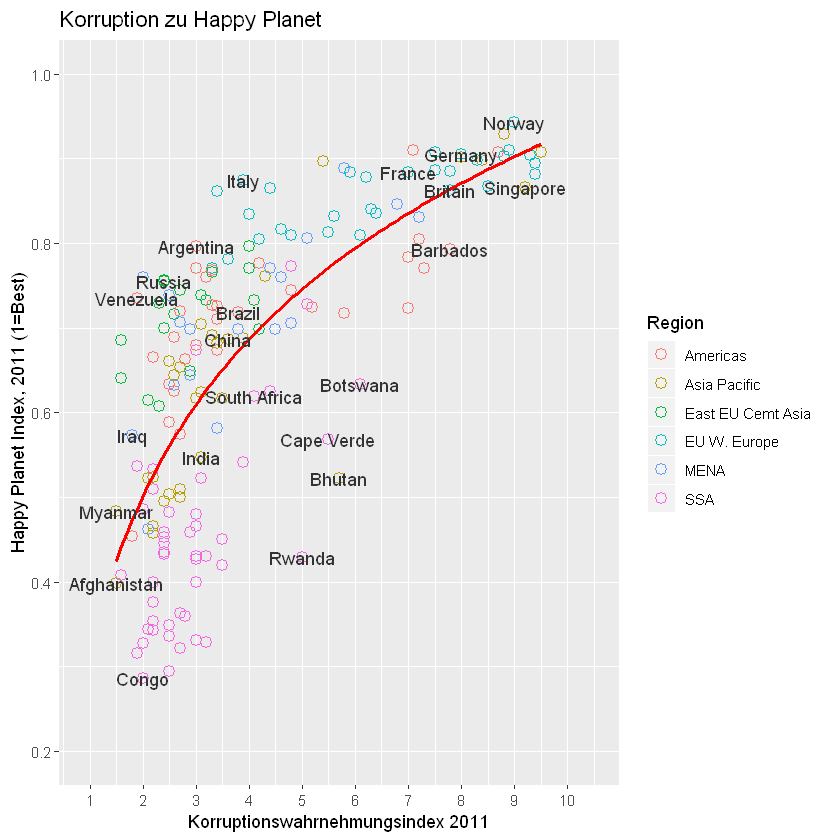

In [21]:
pl6 + ggtitle("Korruption zu Happy Planet")

### Verwendung von ggthemes:

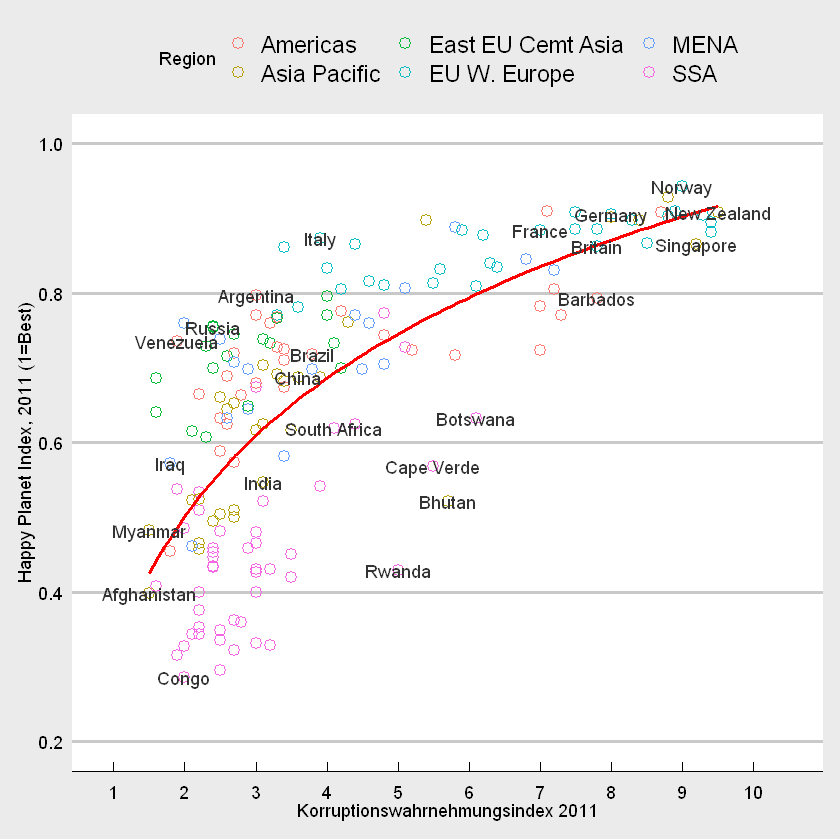

In [22]:
library(ggthemes)
pl6 + theme_economist_white()

Herzlichen Glückwunsch! Sie sind mit Lab. 8 fertig!